In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [383]:
df = pd.read_excel(r'C:\Users\Kashi\Downloads\Airlines.xlsx', header = 0)
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [384]:
df["Month"]=pd.to_datetime(df["Month"],errors = 'ignore')

In [385]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")

df["month"] = df.Date.dt.strftime("%b") # month extraction
df['year'] = df.Date.dt.strftime("%Y")

In [386]:
df.isna().sum()

Month         0
Passengers    0
Date          0
month         0
year          0
dtype: int64

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   month       96 non-null     object        
 4   year        96 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ KB


In [388]:
df.shape

(96, 5)

In [389]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['m']= le.fit_transform(df['month'])

In [390]:
df['m_square'] = df['m']*df['m']
df.head()

,Month,Passengers,Date,month,year,m,m_square
0,1995-01-01,112,1995-01-01,Jan,1995,4,16
1,1995-02-01,118,1995-02-01,Feb,1995,3,9
2,1995-03-01,132,1995-03-01,Mar,1995,7,49
3,1995-04-01,129,1995-04-01,Apr,1995,0,0
4,1995-05-01,121,1995-05-01,May,1995,8,64


In [391]:

dummy_df = pd.get_dummies(df['month'])

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

In [392]:
df.head()

,Month,Passengers,Date,month,year,m,m_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,4,16,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,3,9,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,7,49,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,8,64,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='month', ylabel='Passengers'>

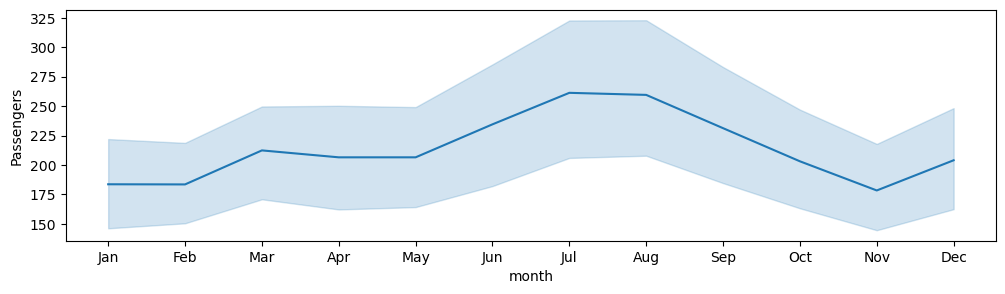

In [393]:
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Passengers", data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

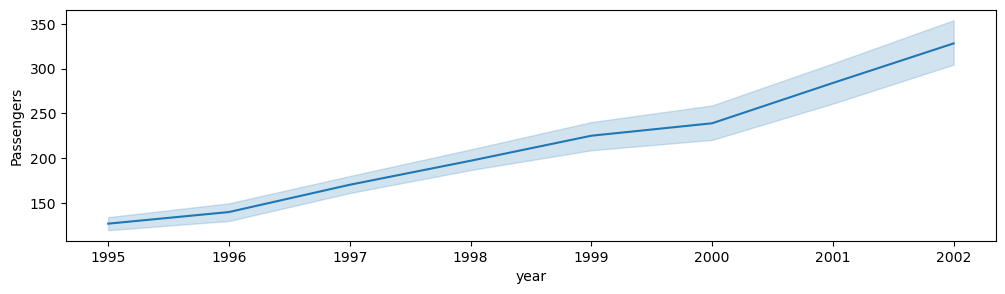

In [394]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers", data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

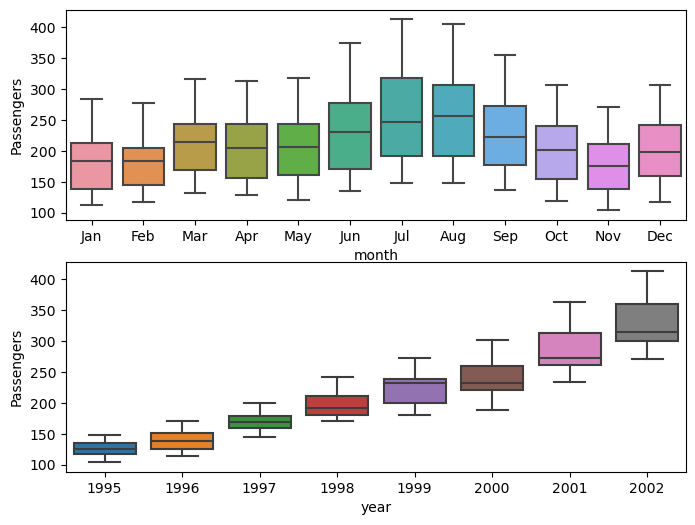

In [395]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

C:\Users\Kashi\AppData\Local\Temp\ipykernel_28128\3511237856.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_excel(r'C:\Users\Kashi\Downloads\Airlines.xlsx', header = 0, index_col=0, parse_dates = True, squeeze = True)


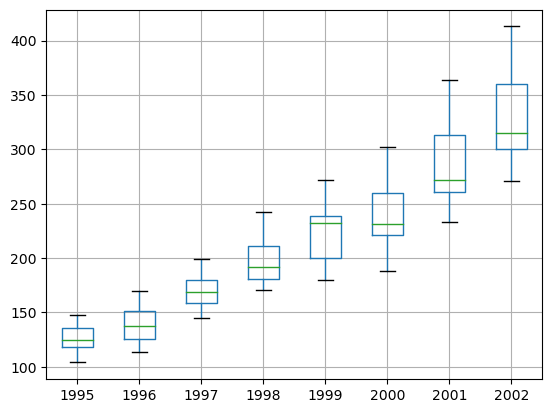

In [396]:
from pandas import DataFrame
from pandas import Grouper
df1 = pd.read_excel(r'C:\Users\Kashi\Downloads\Airlines.xlsx', header = 0, index_col=0, parse_dates = True, squeeze = True)
groups = df1.groupby(Grouper(freq = 'A'))
years = DataFrame()
for name, group in groups:
    years[name.year]= group.values
years.boxplot()
plt.show()
    


In [397]:
Train = df.head(84)
Test = df.tail(12)
Test.tail(12)

,Month,Passengers,Date,month,year,m,m_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,2002-01-01,Jan,2002,4,16,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,2002-02-01,Feb,2002,3,9,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,2002-03-01,Mar,2002,7,49,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,2002-04-01,Apr,2002,0,0,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,2002-05-01,May,2002,8,64,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,2002-06-01,Jun,2002,6,36,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,2002-07-01,Jul,2002,5,25,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,2002-08-01,Aug,2002,1,1,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,Sep,2002,11,121,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,Oct,2002,10,100,0,0,0,0,0,0,0,0,0,0,1,0


In [398]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

138.62530373878812

In [399]:
#Exponentail Model
Exp = smf.ols('np.log(Passengers)~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


146.5763795216237

In [400]:
#Quadratic

Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

138.6354064722598

In [401]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [402]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m','m_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

132.81978481421828

In [403]:
##Multiplicative Seasonality

Mul_sea = smf.ols('np.log(Passengers)~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708626

In [404]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('np.log(Passengers)~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

140.06320204708658

In [405]:
#multiplicative additive quad seasonality 
Mul_Add_sea_Quad = smf.ols('np.log(Passengers)~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','m','m_square']]))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad

140.0632020470863

In [406]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,132.819785
4,rmse_add_sea_quad,132.819785
0,rmse_linear,138.625304
2,rmse_Quad,138.635406
5,rmse_Mult_sea,140.063202
6,rmse_Mult_add_sea,140.063202
1,rmse_Exp,146.576380


In [407]:
model = smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [408]:
pred_new  = pd.Series(model.predict(Test))
pred_new

84    169.285714
85    170.142857
86    197.428571
87    191.285714
88    190.571429
89    214.571429
90    239.571429
91    238.714286
92    213.571429
93    188.428571
94    165.142857
95    189.428571
dtype: float64

In [409]:
Test['forecasted_passengers']=pd.Series(pred_new)

C:\Users\Kashi\AppData\Local\Temp\ipykernel_28128\2223033426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['forecasted_passengers']=pd.Series(pred_new)


In [410]:
new_var = pd.concat([df,Test])
new_var

,Month,Passengers,Date,month,year,m,m_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_passengers
0,1995-01-01,112,1995-01-01,Jan,1995,4,16,0,0,0,0,1,0,0,0,0,0,0,0,NaN
1,1995-02-01,118,1995-02-01,Feb,1995,3,9,0,0,0,1,0,0,0,0,0,0,0,0,NaN
2,1995-03-01,132,1995-03-01,Mar,1995,7,49,0,0,0,0,0,0,0,1,0,0,0,0,NaN
3,1995-04-01,129,1995-04-01,Apr,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1995-05-01,121,1995-05-01,May,1995,8,64,0,0,0,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,1,1,0,1,0,0,0,0,0,0,0,0,0,0,238.714286
92,2002-09-01,355,2002-09-01,Sep,2002,11,121,0,0,0,0,0,0,0,0,0,0,0,1,213.571429
93,2002-10-01,306,2002-10-01,Oct,2002,10,100,0,0,0,0,0,0,0,0,0,0,1,0,188.428571
94,2002-11-01,271,2002-11-01,Nov,2002,9,81,0,0,0,0,0,0,0,0,0,1,0,0,165.142857


<AxesSubplot:>

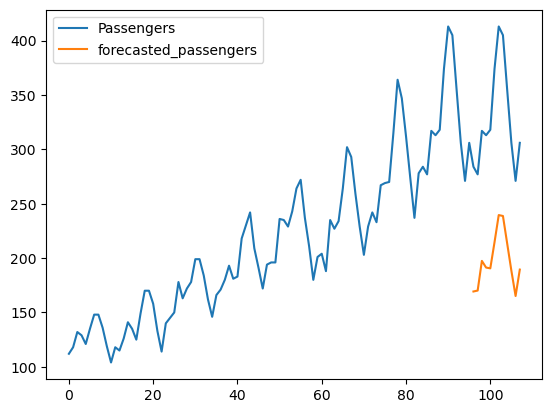

In [411]:
new_var[['Passengers', 'forecasted_passengers']].reset_index(drop=True).plot()
